## Análise Exploratória simples sobre os casos de Corona Vírus (COVID-19) na Coreia

Coronavírus (CID10) é uma família de vírus que causam infecções respiratórias. O novo agente do coronavírus foi descoberto em 31/12/19 após casos registrados na China. Provoca a doença chamada de coronavírus (COVID-19). 
O planeta todo está em alerta, noticiários ao redor do mundo passam horas falando sobre, bolsas de valores despencam por causa dele, o Coronavírus sem dúvida chamou atenção de todos nesse começo de 2020. Por esse motivo, resolvi analisar alguns dados desse surto na Coréia do Sul. 

Dataset disponível em: https://www.kaggle.com/kimjihoo/coronavirusdataset

In [1]:
#importando bibliotecas
import numpy as np 
import pandas as pd 
from scipy.stats import mode
import matplotlib.pyplot as plt 
import seaborn as sns

#montando o DataFrame e deixando-o mais legível
df=pd.read_csv('../input/coronavirusdataset/patient.csv')
df.set_index('patient_id',inplace=True)
df['age']=2020-df['birth_year']
df.drop('birth_year',inplace=True,axis=1)
df['released_date']=pd.to_datetime(df['released_date'])
df['confirmed_date']=pd.to_datetime(df['confirmed_date'])
df['deceased_date']=pd.to_datetime(df['deceased_date'])
df.head(10)

,sex,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
patient_id,,,,,,,,,,,,,,
1,female,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0
2,male,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
3,male,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
4,male,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
5,male,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0
6,male,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaT,released,56.0
7,male,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaT,released,29.0
8,female,Korea,Jeollabuk-do,NaN,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaT,released,63.0
9,female,Korea,capital area,NaN,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaT,released,28.0


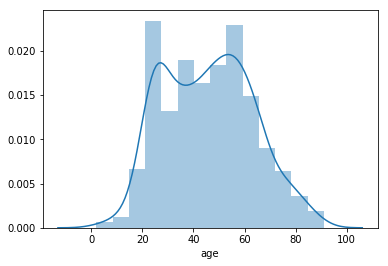

In [2]:
sns.distplot(df['age'])
plt.show()

In [3]:
df[['country','region','infection_reason','state']].describe()

,country,region,infection_reason,state
count,7869,437,154,7869
unique,3,14,14,3
top,Korea,capital area,contact with patient,isolated
freq,7860,191,76,7777


Ao ver esses dados, é possível inferir com facilidade que, na gigantesca maioria dos casos, foi decidido o isolamento do paciente infectado tendo em vista o estado de calamidade causado pela doença. Ademais, podemos também perceber que, mesmo com a doença não se originando na Coréia, grande parte dos doentes foram infectado por coreanos, tendo em vista a gigantesca minoria de infectados chineses.
Pelo fato de as "top" categoricas de "region" e "infection_reason" representarem uma parte pequena de todos os casos (4812), é preciso uma análise mais profunda para retirarmos alguma conclusão. 

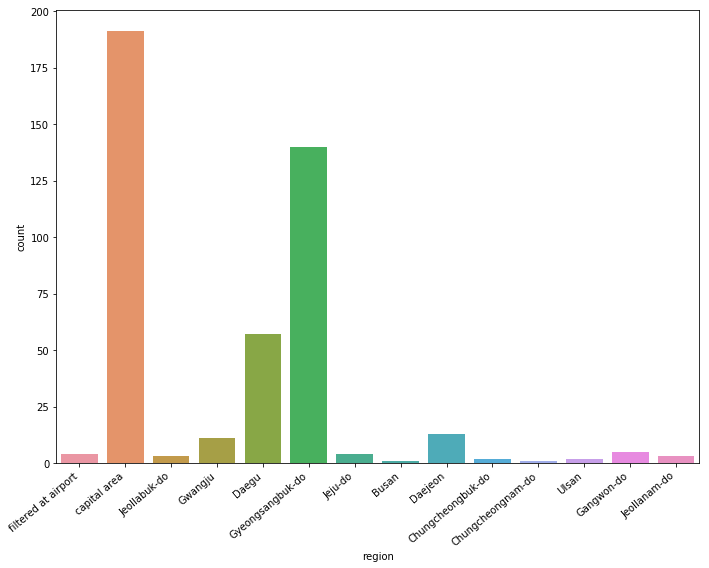

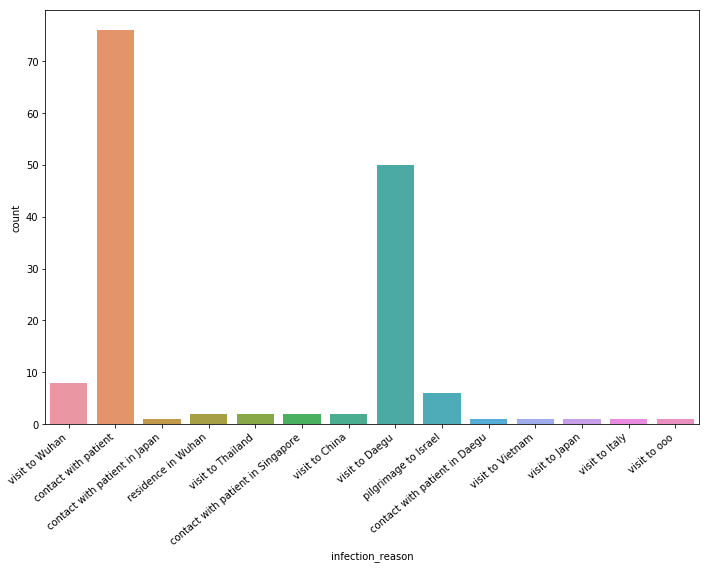

In [4]:
plt.figure(figsize=(10,8))
ax1 = sns.countplot(x="region", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
ax2 = sns.countplot(x="infection_reason", data=df)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Vendo os gráficos acima, é possível reforçar a teoria de que a maioria das infecções ocorreram entre coreanos e foram transmitidas em meios urbanos e populosos, haja vista que a maioria dos casos são decorrentes da região metropolitana da capital e de grandes cidades. 
Ademais, outro ponto que reforça a teoria de que a doença, na Coréia, foi majoritariamente "espalhada" por locais vem do fato de que a quantidade de pessoas que se infectaram com Coronavírus por terem visitado Daegu é mais de 4 vezes maior que o número de infectados que passaram por Wuhan (epicentro da doença). 

## Análise da mortalidade da doença
Agora iremos tentar identificar os fatores que contribuem para a morte por Corona Vírus

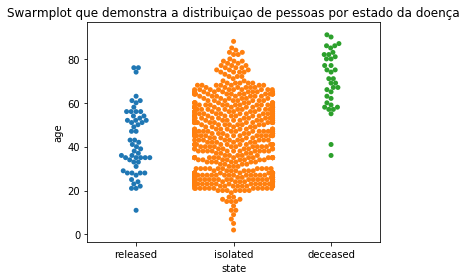

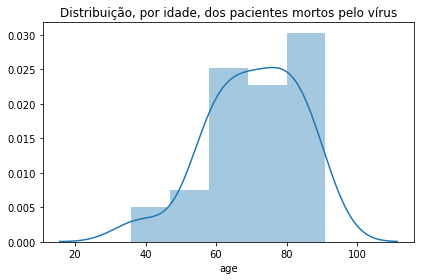

Média de idade dos pacientes que vieram a óbito: 70.61111111111111
Idade do falecido mais velho: 91.0
Idade do falecido mais jovem: 36.0


In [5]:
plt.figure(figsize=(6,4))
sns.swarmplot('state', 'age', data=df)
plt.title('Swarmplot que demonstra a distribuiçao de pessoas por estado da doença')
plt.tight_layout()
plt.show()

df2=df[df['state']=='deceased'].age
sns.distplot(df2)
plt.title('Distribuição, por idade, dos pacientes mortos pelo vírus')
plt.tight_layout()
plt.show()

print('Média de idade dos pacientes que vieram a óbito: '+str(df2.mean()))

print('Idade do falecido mais velho:',df2.max())
print('Idade do falecido mais jovem:',df2.min())

Ao vermos esses gráficos e números, podemos afirmar, assim como esta sendo dito pela comunidade científica, que o vírus tem potencial letal especialmente entre idosos, [sem tanta capacidade de levar jovens adultos a óbito)](https://gauchazh.clicrbs.com.br/saude/noticia/2020/03/entenda-como-a-idade-impacta-na-letalidade-do-coronavirus-ck7pb9azl03yk01oaxamyakmn.html). 

## Análise das datas de confirmação, liberação e morte
Agora, vamos tentar retirar alguns insights partindo das datas presentes no dataset.

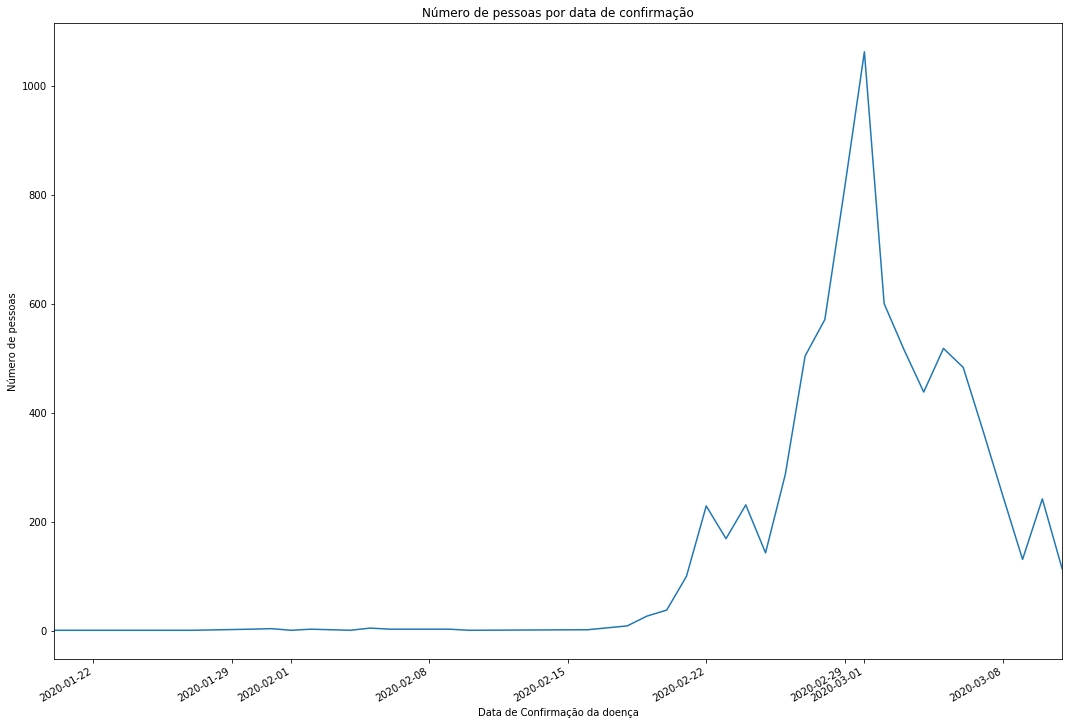

In [6]:
plt.figure(figsize=(15,10))

ax4=df.groupby('confirmed_date').count()['country'].plot()
plt.ylabel('Número de pessoas')
plt.xlabel('Data de Confirmação da doença')
plt.tight_layout()
plt.title('Número de pessoas por data de confirmação')
plt.show()

Vendo logo no primeiro gráfico, podemos perceber que o surto de Coronavírus na Coréia ocorreu por volta de um mês depois da crise se iniciar fortemente na China. É possível também perceber que, por volta do dia 20 de Fevereiro, o surto de fato se espalhou com notável rapidez. Isso está diretamente atrelado com os cultos de um determinado grupo religioso de costumes secretos conhecidos como "Shincheonji Church of Jesus", em que, até a data de 22 (primeiro pico), **tinha membros que contabilizavam por 2 terços dos infectados do país**.
Isso também justifica a observação anterior em que a cidade de Daegu funcionou como um "segundo epicentro" para os coreanos, haja vista que, nessa cidade, encontra-se diversos locais de culto.
Mais iformações sobre o surto atrelado ao culto: 
* https://www.bbc.com/news/world-asia-51603251
* https://www.nytimes.com/2020/02/21/world/asia/china-coronavirus.html#link-6acdef1e

In [7]:
df['released_date'].notnull().sum()

56

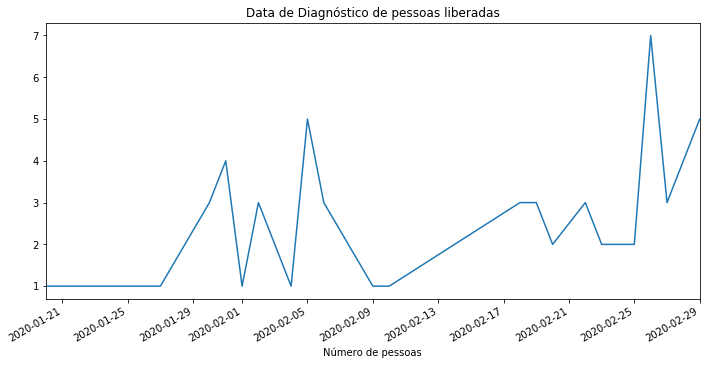

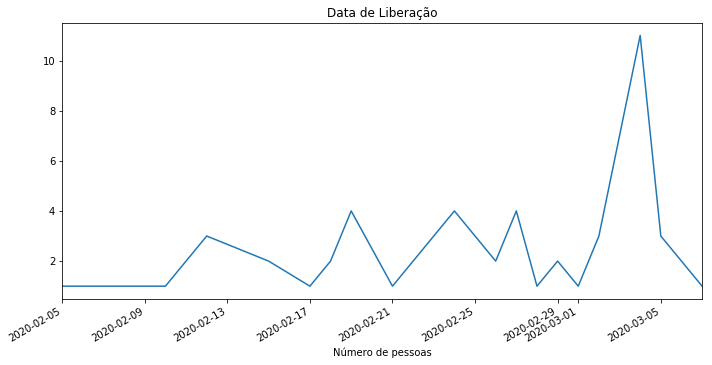

In [8]:
df3=df[df['released_date'].notnull()]

plt.figure(figsize=(10,5))
ax2=df3.groupby('confirmed_date').count()['country'].plot()
plt.xlabel('Número de pessoas')
plt.tight_layout()
plt.title('Data de Diagnóstico de pessoas liberadas')
plt.show()

plt.figure(figsize=(10,5))
ax3=df3.groupby('released_date').count()['country'].plot()
plt.xlabel('Número de pessoas')
plt.tight_layout()
plt.title('Data de Liberação')
plt.show()

In [9]:
df3['obs_time']=df3['released_date']-df3['confirmed_date']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df3['obs_time']

patient_id
1      17 days
2      12 days
3      17 days
4      13 days
5      32 days
6      20 days
7      16 days
8      12 days
9      24 days
10     19 days
11     10 days
12     17 days
13     22 days
14     16 days
15     22 days
16     15 days
17      7 days
18     14 days
19     16 days
20     19 days
21     24 days
22      9 days
23     23 days
24     21 days
25     25 days
28      7 days
32     15 days
37      8 days
39     14 days
50     12 days
51      7 days
63      8 days
65      8 days
83     10 days
222    14 days
241    11 days
347    11 days
589     4 days
593    10 days
927     8 days
938     7 days
1013    1 days
1118    7 days
1129    7 days
1244    8 days
1246    6 days
1255    7 days
1256    5 days
1370    5 days
1378    5 days
1567    5 days
2466    3 days
2468    4 days
2470    4 days
2733    5 days
2858    4 days
Name: obs_time, dtype: timedelta64[ns]